In [7]:
from scripts.load_data import load_train, load_test, load_example


import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
import numpy as np

## Image recognition met een "normaal" neuraal netwerk. 

Neurale netwerken zijn ontzettend sterke wiskundige modellen. Een “normaal” neuraal netwerk heeft echter wel wat limieten. Om een aantal van deze limieten te doorbreken, kan je een convolutional neuraal netwerk gebruiken. 

We beginnen met het exploreren van de limieten van normale neurale netwerken, dit doen we doormiddel van de MNIST-dataset.

MNIST is een dataset van 70.000 handgeschreven cijfers (0..9), opgesplitst in 60.000 training images en 10.000 testing images. We hebben al functies geschreven waarmee je de data kan inladen, zie de cell hieronder.

Deze data is steeds opgedeeld in 2 stukken: train en labels.

train is een (numpy) array met alle inputafbeeldingen erin.
labels is een (numpy) array met voor elke inputafbeelding de werkelijke waarde.

Als train[5] een afbeelding van een 4 is, dan geldt dus: labels[5] == 4

Label: 4


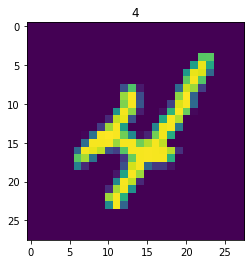

In [8]:
# Laad de trainingsdata en labels
train_data, train_labels = load_train(padding=0)
# De kleurwaarden in de afbeelding zijn nu 0 tot 255, we zetten deze om naar -0.5 tot 0.5
train_data = (train_data / 255) - 0.5


plt.imshow(train_data[9])
plt.title(f"{train_labels[9]}")
print(f"Label: {train_labels[9]}")
plt.show()



### Data formatting
Voordat we een neuraal netwerk kunnen trainen op de MNIST-data, moet deze verwerkt worden.

De input data zijn op het moment grijsafbeeldingen, en dus 2-dimensionaal (x,y).
Alleen elke input van dit neuraal netwerk moet 1-dimensionaal zijn. Probeer nu zelf train_data om te zetten naar een
correct format. De labels hebben wij zelf al voor je omgezet naar het juiste formaat.


In [9]:
train_labels = to_categorical(train_labels, 10)

x = len(train_data[0])
y = len(train_data[0][0])

train_data = np.reshape(train_data, (len(train_data), x*y) )
print(train_data.shape)

(60000, 784)


In [10]:
print(train_data.shape)
print(train_data)

(60000, 784)
[[-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 ...
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 ... -0.5 -0.5 -0.5]]


Handig om te weten: Image recognition geeft in het algemeen ontzettend grote input vectors.
MNIST is in grayscale, maar veel plaatjes zijn dat niet. Als je ook nog kleur wil meegeven,
zou de input vector nog drie keer zo groot zijn.

### Bouwen van een NN

De volgende stap is om een neuraal netwerk te bouwen.
Maak zelf de eerste Dense layer af, kijk vervolgens ook naar hoeveel hidden layers je toevoegt.
Bij image recognition is de activation function ook erg belangrijk.
Denk goed na over welke je gebruikt. De laatste layer geven wij alvast aan je.


In [11]:
model = Sequential()
# input_dim moet gelijk zijn aan de lengte van 1 input
model.add(Dense(32, input_dim=len(train_data[0]))) # FIXME
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


Hieruit kan je al direct het eerste probleem van normale neurale netwerken inzien; er is een gigantische hoeveelheid trainbare parameters. 

Iedere node moet verbonden zijn aan iedere node. Bij image recognition is de input vector gigantisch, dit houdt dus ook in dat er een gigantische hoeveelheid weights zijn waarmee jouw neuraal netwerk rekening moet houden. 

Dit maakt het trainen best zwaar en langzaam.

Het klaarmaken van een neural network in Keras heeft de volgende stappen:
- Aangeven van de layers, dit hebben we net gedaan
- Compilen, het model word nu geconfigureerd om hem klaar te maken voor trainen
- Fit, het model word nu "getraind" op data die je meegeeft. Hieraan geef je zowel data als labels mee
- Evaluate; Controller het model om te kijken of het accuraat is. Geef hieraan data en labels mee, maar zorg dat deze data niet ook in je trainingsdata zit
- Predict; Geef inputdata mee, waarvan je het label nog niet kent. het NN probeert het label nu te bedenken.
Ga nu door met het trainen van dit neuraal netwerk. Ook de `.compile()` hebben wij al aan je geven, ook hier mag je mee spelen.

Probeer jouw neuraal netwerk zo accuraat mogelijk te maken. (doe dit door te kijken naar de resultaten van de `.fit()`; `.evaluate()` komt later).

In [12]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In AI is het aantal epochs het aantal keer dat je over de volledige dataset heen gaat om te trainen.

Experimenteer met deze waarde om te kijken wat voor invloed deze heeft.

In [13]:
print("----1 epoch----")
model.fit(train_data, train_labels, epochs=1)

print("\n----2 epochs----")
model.fit(train_data, train_labels, epochs=2)

print("\n----3 epochs----")
model.fit(train_data, train_labels, epochs=3)

----1 epoch----
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4294 - accuracy: 0.8747

----2 epochs----
Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3357 - accuracy: 0.9037
Epoch 2/2
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3216 - accuracy: 0.9086

----3 epochs----
Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.9109
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3077 - accuracy: 0.9138
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3005 - accuracy: 0.9153


### Het evalueren van het neurale netwerk
Ook hier moet de data eerst nog omgevormd worden, gebruik hiervoor dezelfde code als bij de training data.

In [14]:
test_data, test_labels = load_test(padding=0)

test_data = test_data/255.0 - 0.5

x = len(test_data[0])
y = len(test_data[0][0])

test_data = np.reshape(test_data, (len(test_data), x*y) )
test_labels = to_categorical(test_labels, 10)

In [15]:
result = model.evaluate(test_data, test_labels)

print(f"loss: {result[0]}, accuracy: {result[1]} van de 1.0")

313/313 [==============================] - 2s 5ms/step - loss: 0.2991 - accuracy: 0.9151
loss: 0.2991221845149994, accuracy: 0.9150999784469604 van de 1.0


### Huh?
Hoogstwaarschijnlijk scoort jouw neuraal netwerk nu ontzettend slecht. Om een limiet van neurale netwerken zichtbaar te maken, hebben we een klein beetje valsgespeeld. We hebben wat padding toegevoegd; een aantal pixels aan de linkerkant bij de testing data en een aantal pixels aan de rechterkant bij de training data. Zie de plots hieronder.

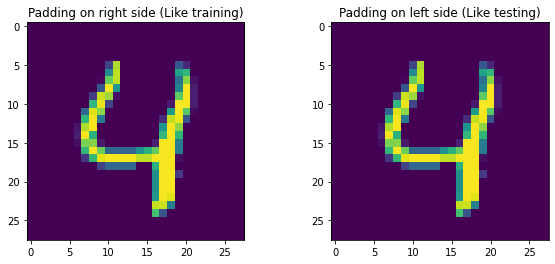

In [16]:
(example_r, example_l), label = load_example(paddingR=0, paddingL=0)
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(example_r)
axs[0].set_title("Padding on right side (Like training)")

axs[1].imshow(example_l)
axs[1].set_title("Padding on left side (Like testing)")

plt.show()

De standaardwaarde voor de padding is 3(!!) pixels, dit heeft een gigantisch effect op de accuratesse.
Formatteer nog één keer de data (`examples`), en kijk wat er uit de `.predict()` komt.

Er bestaat een kans dat jouw model hier de goede voorspelt, probeer dan bij `load_example()` het argument `index` te veranderen naar een ander getal. Waarschijnlijk zal het dan wel fout voorspellen


In [17]:
examples = np.array([example_r, example_l]) # FIXME
x = len(examples[0])
y = len(examples[0][0])

examples = np.reshape(examples, (len(examples), x*y) )
print(examples)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
res = model.predict(examples)
classes = np.argmax(res, axis=1)

print(res, classes)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [4 4]


### Waarom?

De voorspellingen van een gewoon neuraal netwerk zijn ruimtelijk bepaald, het herkent patronen op specifieke plekken. Het verplaatsen van deze patronen met maar een paar pixels kan al genoeg zijn om het onmogelijk te maken voor een gewoon neuraal netwerk om deze te herkennen. 

Een neuraal netwerk getraind op het herkennen van honden en fietsen, zou heel makkelijk het volgende gedrag kunnen laten zien:



![Right!](src/top-left-dog.png)

![Wrong!](src/top-left-bike.png)


Speel is een beetje rond met de padding, kijk is hoeveel impact 4 pixels heeft, zelfs 1 pixel kan al een grote impact hebben!

Wij raden aan om alleen de horizontale padding te veranderen, het format van het padding argument in `load_train`, `load_test`, en `load_example` is dan: `((0, 0), (0, 0), (left sided padding, right sided padding))`.

- Aldewereld, H. & van der Bijl, B. & Bunk, J. (2017, oktober). Applied Artificial Intelligence. Geraadpleegd op 13 maart 2020, van https://canvas.hu.nl/courses/7569/files/694738/download?wrap=1

- Chollet, F. (2019, November 6). Getting started with the Keras Sequential model. Geraadpleegd op 13 maart 2020, van keras.io: https://keras.io/getting-started/sequential-model-guide/